# Import packages

In [5]:
import os

import matplotlib.pyplot as plt

from components.image_preprocessing.image_preprocessor import ImagePreprocessor
from components.predictor.predictor import Predictor

# Set up components

In [6]:
FOLDER_PATH = 'input_images'

img_preprocessor = ImagePreprocessor()
predictor = Predictor('efficientdet_lite4')
predictor.load_model()

dict_with_results = {}

starting to load efficientdet_lite4 model...
efficientdet_lite4 model loaded!


# Run predictions on images and draw boxes

In [7]:
# Draw parameters
MIN_SCORE = 0.2
FILTER_PREDICTIONS = ['person']

iterator = 1
for filename in os.listdir(FOLDER_PATH):
    print(f'Starting transformations/predictions on: {filename}')
    rgb_image, rgb_tensor = img_preprocessor.read_transform(
                            f'{FOLDER_PATH}/{filename}')
    predictor.predict(rgb_tensor)
    image_with_boxes = predictor.draw_boxes(rgb_image, min_score=MIN_SCORE,
                                            filter_predictions=FILTER_PREDICTIONS)
    dict_with_results[f'img{iterator}_predicted'] = image_with_boxes
    iterator += 1

print('done!')

Starting transformations/predictions on: img1.png
Prediction time: 2.01 seconds
Number of objects drawn: 3
Starting transformations/predictions on: img10.jpg
Prediction time: 0.57 seconds
Number of objects drawn: 7
Starting transformations/predictions on: img2.jpg
Prediction time: 0.57 seconds
Number of objects drawn: 3
Starting transformations/predictions on: img3.jpg
Prediction time: 0.57 seconds
Number of objects drawn: 10
Starting transformations/predictions on: img4.jpg
Prediction time: 0.57 seconds
Number of objects drawn: 7
Starting transformations/predictions on: img5.jpg
Prediction time: 0.56 seconds
Number of objects drawn: 17
Starting transformations/predictions on: img6.jpg
Prediction time: 0.55 seconds
Number of objects drawn: 3
Starting transformations/predictions on: img7.jpg
Prediction time: 0.57 seconds
Number of objects drawn: 6
Starting transformations/predictions on: img8.jpg
Prediction time: 0.58 seconds
Number of objects drawn: 11
Starting transformations/predicti

# Print images with drawn boxes

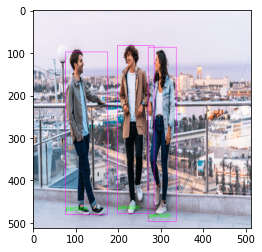

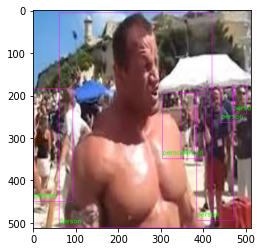

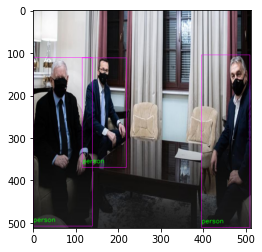

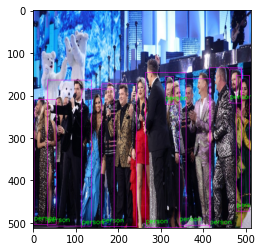

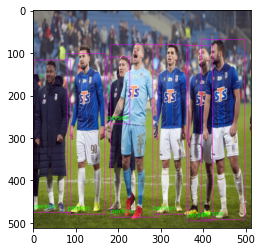

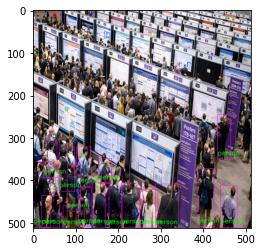

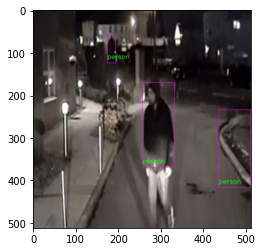

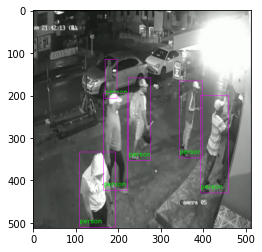

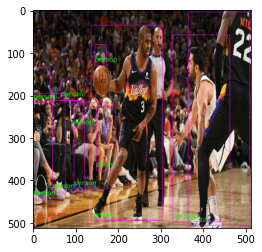

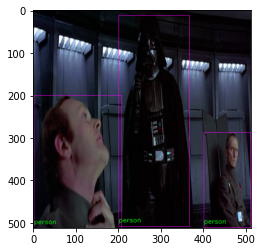

In [8]:
for image in dict_with_results.keys():
    img = dict_with_results[image][:,:,::-1]
    plt.imshow(img)
    plt.show()